In [1]:
import pandas as pd
import numpy as np


LSA, which stands for Latent Semantic Analysis, is one of the foundational techniques used in topic modeling. The core idea is to take a matrix of documents and terms and try to decompose it into separate two matrices –

1) A document-topic matrix

2) A topic-term matrix.

Therefore, the learning of LSA for latent topics includes matrix decomposition on the document-term matrix using Singular value decomposition. It is typically used as a dimension reduction or noise-reducing technique.


to find the few latent topics that capture the relationships among the words and documents, we want to perform dimensionality reduction on document term matrix A.

Then, we have to reduce the dimensions of the above document term matrix to k, which specifies the number of desired topics) dimensions.

This dimensionality reduction can be done using truncated Singular Value decomposition.


So, SVD returns us vector representations for every document and term in our data. The length of each vector would be k. One important use of these vectors is we can find similar words and similar documents with the help of the cosine similarity metric.

Advantages of LSA
1. It is efficient and easy to implement.

2. It also gives decent results that are much better compared to the plain vector space model.

3. It is faster compared to other available topic modeling algorithms, as it involves document term matrix decomposition only.


Disadvantages of LSA
1. Since it is a linear model, it might not do well on datasets with non-linear dependencies.

2. LSA assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems.

3. LSA involves SVD, which is computationally intensive and hard to update as new data comes up.

4. Lack of interpretable embeddings (we don’t know what the topics are, and the components may be arbitrarily positive/negative)

5. Need for a really large set of documents and vocabulary to get accurate results

6. It provides less efficient representation


To evaluate topic models, Topic Coherence is a widely used metric. It uses the latent variable models. Each generated topic has a list of words. In topic coherence, we will find either the average or the median of pairwise word similarity scores of the words present in a topic.

Conclusion: The model will be considered as a good topic model if we got the high value of the topic coherence score.



In [2]:
## getting text corpus
text=["Computer programming is the process of designing and building an executable computer program to accomplish a specific computing result or to perform a specific task.",

      "Programming involves tasks such as: analysis, generating algorithms, profiling algorithms' accuracy and resource consumption, and the implementation of algorithms in a chosen programming language (commonly referred to as coding).",

      "The source program is written in one or more languages that are intelligible to programmers, rather than machine code, which is directly executed by the central processing unit.",

      "The purpose of programming is to find a sequence of instructions that will automate the performance of a task (which can be as complex as an operating system) on a computer, often for solving a given problem.",

      "Proficient programming thus often requires expertise in several different subjects, including knowledge of the application domain, specialized algorithms, and formal logic.",

      "Tasks accompanying and related to programming include: testing, debugging, source code maintenance, implementation of build systems, and management of derived artifacts, such as the machine code of computer programs.",

      "These might be considered part of the programming process, but often the term software development is used for this larger process with the term programming, implementation, or coding reserved for the actual writing of code.",

      "Software engineering combines engineering techniques with software development practices.",

     "Reverse engineering is a related process used by designers, analysts and programmers to understand and re-create/re-implement"]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tf-idf is used to get DTM filled with tfidf values for the text corpus.

## Calculate tfidf scores
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True) # under the hood, lowrcasing, removing stop words, special characters

DTM = np.asarray(vectorizer.fit_transform(text).todense())


In [7]:
vectorizer

TfidfVectorizer(stop_words='english')

In [36]:
from sklearn.decomposition import TruncatedSVD

#algo can be arpack (naive) or randomized, n_components=int - desired dimensility of output data, number of arrays to be calculated with scores for each feature.


svd_modeling = TruncatedSVD(n_components=6, algorithm='randomized', random_state=122, n_iter=100)
svd = svd_modeling.fit_transform(DTM)
components = svd_modeling.components_
vocab = vectorizer.get_feature_names_out()
vocab

array(['accompanying', 'accomplish', 'accuracy', 'actual', 'algorithms',
       'analysis', 'analysts', 'application', 'artifacts', 'automate',
       'build', 'building', 'central', 'chosen', 'code', 'coding',
       'combines', 'commonly', 'complex', 'computer', 'computing',
       'considered', 'consumption', 'create', 'debugging', 'derived',
       'designers', 'designing', 'development', 'different', 'directly',
       'domain', 'engineering', 'executable', 'executed', 'expertise',
       'formal', 'generating', 'given', 'implement', 'implementation',
       'include', 'including', 'instructions', 'intelligible', 'involves',
       'knowledge', 'language', 'languages', 'larger', 'logic', 'machine',
       'maintenance', 'management', 'operating', 'perform', 'performance',
       'practices', 'problem', 'process', 'processing', 'proficient',
       'profiling', 'program', 'programmers', 'programming', 'programs',
       'purpose', 'referred', 'related', 'requires', 'reserved',
    

In [32]:
svd_modeling # contains document - document-topic distribution: each document gives strength distribution of all topics as columns. 

TruncatedSVD(n_components=6, n_iter=100, random_state=122)

In [27]:
components.shape  # 6 topics with 93 scores for 93 features.

(6, 93)

In [37]:
svd # document-topic distribution/strength can be both negative and positive

array([[ 4.05001780e-01, -2.55035328e-01, -3.03711075e-01,
         4.70477092e-01,  1.39569791e-01, -5.43189253e-01],
       [ 3.75026103e-01, -4.07293338e-01,  4.99989686e-01,
        -1.72464023e-01, -2.69901676e-01, -6.12640575e-02],
       [ 3.36373526e-01, -3.77738276e-02, -4.96526813e-01,
        -5.14478038e-01,  2.99333154e-01,  1.48895080e-01],
       [ 2.71039732e-01, -3.46502813e-01, -2.10718851e-01,
         6.07724538e-01,  5.88387061e-02,  5.53911167e-01],
       [ 2.17225793e-01, -3.96222134e-01,  5.45516078e-01,
        -1.34558744e-01,  5.76393037e-01,  7.74402717e-02],
       [ 5.09430618e-01, -2.02854182e-01, -3.23907601e-01,
        -3.73053879e-01, -2.93332620e-01,  1.45749357e-01],
       [ 6.25493402e-01,  2.10524241e-01,  1.93419274e-01,
         7.05875539e-02, -3.55400828e-01, -1.59243887e-01],
       [ 3.49730256e-01,  5.89348044e-01,  2.46949741e-01,
         1.64577793e-01, -4.80062376e-03,  3.70764945e-01],
       [ 4.30398765e-01,  4.97847555e-01, -2.820

In [28]:
len(vocab)

93

In [29]:
topic_word_list = []
def get_topics(components): 
    for i, comp in enumerate(components):
        terms_comp = zip(vocab,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:4]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        topic_word_list.append(topic)
        #print(topic_word_list)
    return topic_word_list
get_topics(components)

['  programming process code software',
 '  engineering software development combines',
 '  algorithms software application different',
 '  task computer specific automate',
 '  programmers application different domain',
 '  software automate complex given']

In [15]:
#pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(4):
    wc = WordCloud(width = 1000, height=700, margin = 3, prefer_horizontal=0.7, scale = 1, background_color='black', relative_scaling=0).generate(topic_word_list[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'

### NMF Model

NMF stands for Non-negative Matrix Factorization, which is a technique commonly used in topic modeling. In topic modeling, the goal is to identify the underlying topics or themes present in a collection of documents. NMF is a matrix factorization technique that factors a non-negative data matrix into two lower-rank matrices, where all elements are non-negative. These lower-rank matrices represent the "topics" and the "document-topic distribution," respectively.

In the context of topic modeling, given a matrix where rows represent documents and columns represent terms (typically after some form of text preprocessing and feature extraction), NMF decomposes this matrix into two matrices: one representing the topics and the other representing the distribution of topics in each document.

NMF is particularly useful in cases where the data naturally adheres to non-negativity constraints, such as in text data where word frequencies are non-negative. It helps in identifying meaningful and interpretable topics, making it a popular choice in text mining and natural language processing tasks.

In [17]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=6, random_state=1)
W = nmf_model.fit_transform(DTM)
H = nmf_model.components_


In [33]:
W # document - topic strength. Values can't be negative

array([[0.        , 0.        , 0.        , 0.79850812, 0.        ,
        0.        ],
       [0.01832547, 0.        , 0.56302732, 0.        , 0.        ,
        0.00259829],
       [0.        , 0.        , 0.        , 0.        , 0.8147807 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.79001317],
       [0.        , 0.        , 0.56623674, 0.        , 0.        ,
        0.        ],
       [0.42595136, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05820704, 0.32951074, 0.08010165, 0.07003795, 0.        ,
        0.00860956],
       [0.        , 0.43224467, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.38674091, 0.        , 0.        , 0.0518266 ,
        0.        ]])

In [21]:
H # topic - terms strength

array([[5.52136724e-01, 0.00000000e+00, 6.25205965e-03, 5.73708869e-02,
        0.00000000e+00, 6.25205965e-03, 0.00000000e+00, 0.00000000e+00,
        5.52136724e-01, 0.00000000e+00, 5.52136724e-01, 0.00000000e+00,
        0.00000000e+00, 6.25205965e-03, 8.59223536e-01, 5.47568449e-02,
        0.00000000e+00, 6.25205965e-03, 0.00000000e+00, 3.94480780e-01,
        0.00000000e+00, 5.73708869e-02, 6.25205965e-03, 0.00000000e+00,
        5.52136724e-01, 5.52136724e-01, 0.00000000e+00, 0.00000000e+00,
        2.15769973e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.25205965e-03, 0.00000000e+00, 0.00000000e+00,
        4.55592064e-01, 5.52136724e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.25205965e-03, 0.00000000e+00, 6.25205965e-03,
        0.00000000e+00, 5.73708869e-02, 0.00000000e+00, 4.66343468e-01,
        5.52136724e-01, 5.52136724e-01, 0.00000000e+00, 0.000000

In [16]:
get_topics(H)

['  programming process code software',
 '  engineering software development combines',
 '  algorithms software application different',
 '  task computer specific automate',
 '  programmers application different domain',
 '  software automate complex given',
 '  code accompanying artifacts build',
 '  engineering software process development',
 '  algorithms programming application different',
 '  specific computer accomplish building',
 '  central directly executed intelligible',
 '  automate complex given instructions']

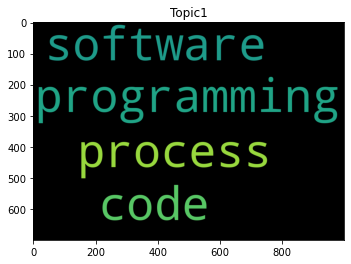

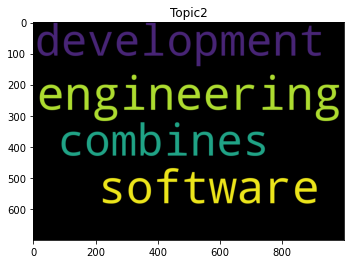

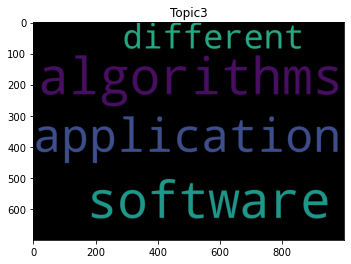

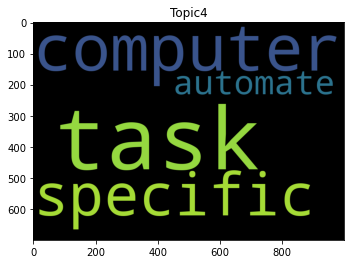

In [17]:
for i in range(4):
    wc = WordCloud(width = 1000, height=700, margin = 3, prefer_horizontal=0.7, scale = 1, background_color='black', relative_scaling=0).generate(get_topics(H)[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.show()

In summary, if your data is non-negative and interpretability of topics is crucial, NMF might be a better choice. However, if you're looking for a general-purpose dimensionality reduction technique or working with matrices where negative values are present and little fast processing, Truncated SVD could be more appropriate.

Ultimately, it's a good idea to experiment with both techniques and choose the one that best fits your specific dataset and goals.